The following diagram represents the problems being solved below:  
source: http://tutorial.math.lamar.edu/Classes/DE/Vibrations.aspx

<img src="img/hanging_mass.png" height="500" width="400">

\begin{align}
mu'' + γu' + ku = F(t)
\end{align}


\begin{align}
mg=kL
\end{align}

 - $\ mu'' \$ corresponds to mass x acceleration
 
 - $\ γu' \$ corresponds to the damping factor x velocity  
 
 - $\ ku \$ corresponds to the spring constant x position  
 
 - F(t) is the forcing function  

# Free, Undamped Vibrations

Example 1 A 16 lb object stretches a spring 8/9 ft by itself. There is no damping and no external forces acting on the system. The spring is initially displaced 6 inches upwards from its equilibrium position and given an initial velocity of 1 ft/sec downward. Find the displacement at any time t, u(t).

\begin{align}
mu'' + ku = 0
\end{align}

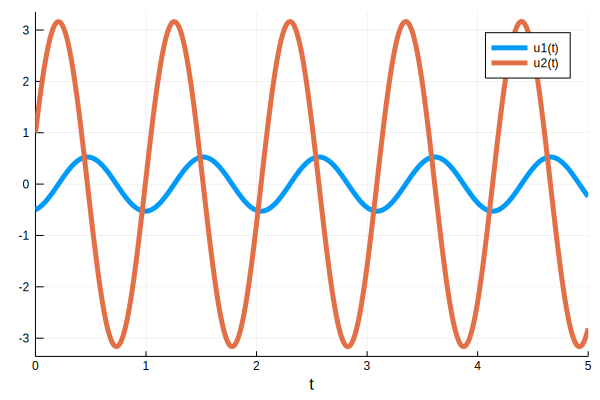

In [51]:
using DifferentialEquations
using Plots

g = 32.0 # ft/s
weight = 16.0 # lbs
m = weight / g
L = 8.0 / 9.0

k = m * g / L

tspan = (0.0, 5.0)
u₀ = [-0.5, 1.0] # u0 = 0.5 ft. and du = 1 ft/s

function free_undamped(du, u, p, t)
    y = u[1] # Position
    dy = u[2] # Velocity
    du[1] = dy # derivative of y is dy
    du[2] = -k/m*y # a = -k/m*y
end 

prob = ODEProblem(free_undamped, u₀, tspan)
sol = solve(prob)

plot(sol,linewidth=5)

In [52]:
sol(1.0)

2-element Array{Float64,1}:
 -0.5266671463615389
  0.1221973859438604

In [53]:
t = 1.0
0.52705 * cos(6.0 - 2.81984)

-0.5266580709034284

In [28]:
k

18.0

# Free Damped Vibrations

Take the spring and mass system from the first example and attach a damper to it that will exert a force of 12 lbs when the velocity is 2 ft/s. Find the displacement at any time t, u(t).

Formula for damping force \$ Fd = -γu' \$

Equation for system:

\begin{align}
mu'' + γu' + ku = 0
\end{align}

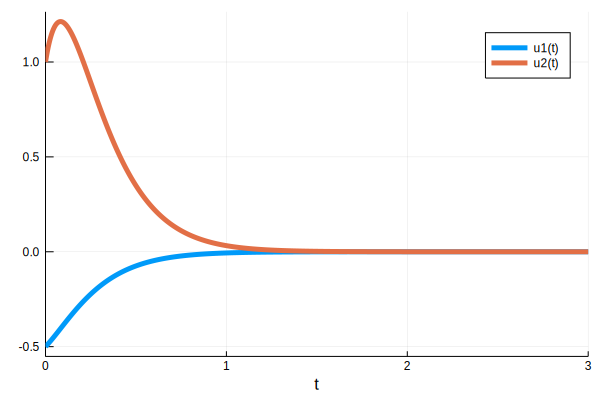

In [57]:
g = 32.0 # ft/s
weight = 16.0 # lbs
m = weight / g
L = 8.0 / 9.0

k = m * g / L

γ = 12.0 / 2.0 # Fd / v => the damping coefficient

tspan = (0.0, 3.0)
u₀ = [-0.5, 1.0] # u0 = 0.5 ft. and du = 1 ft/s

function free_undamped(du, u, p, t)
    y = u[1] # Position
    dy = u[2] # Velocity
    du[1] = dy # derivative of y is dy
    du[2] = -(γ*dy + k*y) / m # a = -k/m*y
end 

prob = ODEProblem(free_undamped, u₀, tspan)
sol = solve(prob)

plot(sol,linewidth=5)

In [58]:
u(t) = -0.5 * exp(-6t) - 2t*exp(-6t)
u(1)

-0.006196880441665897

In [59]:
sol(1)

2-element Array{Float64,1}:
 -0.006196372607920885
  0.03222076505774027 

# Forced Undamped

A 3 kg object is attached to spring and will stretch the spring 392 mm by itself. 
There is no damping in the system and a forcing function of the form

\begin{align}
mu'' + ku = F(t)
\end{align}

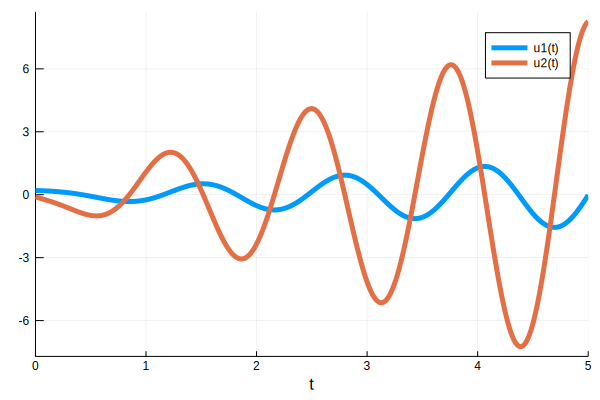

In [64]:
g = 9.8 # m/s
m = 3.0 # kg
L = 0.392 # m

k = m * g / L
ω₀ = sqrt(k / m)


tspan = (0.0, 5.0)
u₀ = [0.2, -0.1] # u0 = 0.2 m and du = 1 m/s

function free_undamped(du, u, p, t)
    y = u[1] # Position
    dy = u[2] # Velocity
    du[1] = dy # derivative of dy/dt -> a
    du[2] = (10cos(ω₀*t) - k*y) / m
end 

prob = ODEProblem(free_undamped, u₀, tspan)
sol = solve(prob)

plot(sol,linewidth=5)

In [65]:
sol(1)

2-element Array{Float64,1}:
 -0.24374303664802313
  1.0837329519827101 

In [66]:
u(t) = 0.200998cos(5t + 0.099699) + 1//3 * t * sin(5t)
u(1)

-0.24372467015540283

In [67]:
sol(5)

2-element Array{Float64,1}:
 -0.01840427708528204
  8.254060455452873  

In [68]:
u(5)

-0.01969796387091091